In [1]:
import pandas as pd
import numpy as np

In [2]:
movies=pd.read_csv('movies.csv',usecols=['movieId','title'])
ratings=pd.read_csv('rating.csv',usecols=['userId','movieId','rating'])

In [3]:
movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [4]:
ratings.head()

,userId,movieId,rating
0,1,16,4.0
1,1,24,1.5
2,1,32,4.0
3,1,47,4.0
4,1,50,4.0


In [5]:
df=pd.merge(ratings,movies,on='movieId')
df.head()

,userId,movieId,rating,title
0,1,16,4.0,Casino (1995)
1,1,24,1.5,Powder (1995)
2,1,32,4.0,Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
3,1,47,4.0,Seven (a.k.a. Se7en) (1995)
4,1,50,4.0,"Usual Suspects, The (1995)"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   105339 non-null  int64  
 1   movieId  105339 non-null  int64  
 2   rating   105339 non-null  float64
 3   title    105339 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.2+ MB


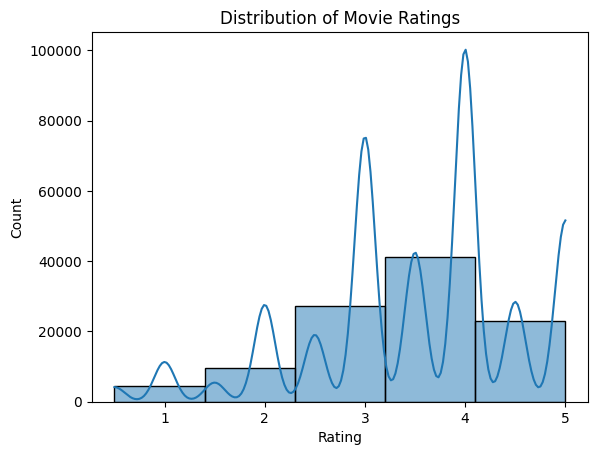

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.figure(figsize=(12,8))
sns.histplot(ratings['rating'], bins=5, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [8]:
#how many person have rated 
# groupby(by=['title']): Groups the data by movie title.
# ['rating'].count(): Counts the number of ratings for each movie.
# reset_index(): Converts the grouped data back into a DataFrame.
# rename(): Renames the rating column to totalRatingCount for clarity.
# [['title', 'totalRatingCount']]: Selects only the title and total rating count columns.
combine_movie_rating=df.dropna(axis=0,subset=['title'])
count=(combine_movie_rating.groupby(by=['title'])['rating'].count().reset_index().rename(columns={'rating':'totalRatingCount'})[['title','totalRatingCount']])
count.head()

,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),1
3,'Til There Was You (1997),3
4,"'burbs, The (1989)",20


C:\Users\singh\AppData\Local\Temp\ipykernel_15248\1590973492.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='totalRatingCount', y='title', data=top_10_movies, palette='viridis')


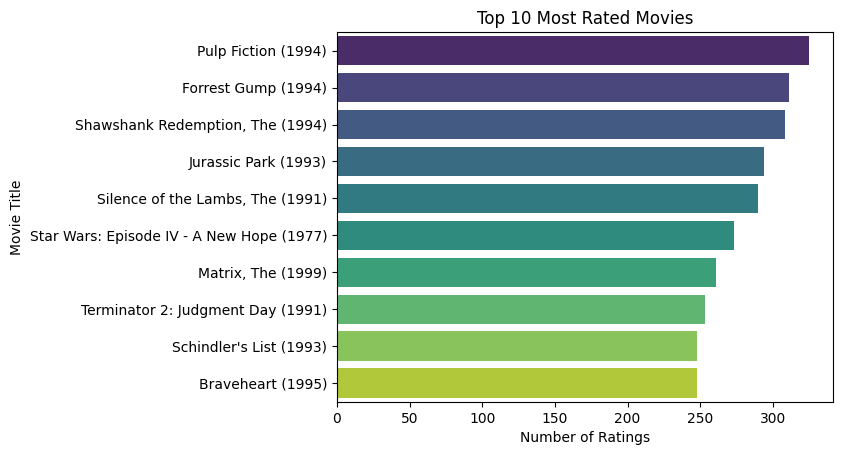

In [9]:
top_10_movies = count.sort_values('totalRatingCount', ascending=False).head(10)
# plt.figure(figsize=(10,6))
sns.barplot(x='totalRatingCount', y='title', data=top_10_movies, palette='viridis')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()

In [10]:
rating_with_totalrating=combine_movie_rating.merge(count,left_on='title',right_on='title',how='left')
rating_with_totalrating.head()

,userId,movieId,rating,title,totalRatingCount
0,1,16,4.0,Casino (1995),84
1,1,24,1.5,Powder (1995),38
2,1,32,4.0,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),207
3,1,47,4.0,Seven (a.k.a. Se7en) (1995),196
4,1,50,4.0,"Usual Suspects, The (1995)",228


In [11]:
count.describe()

,totalRatingCount
count,10323.000000
mean,10.204301
std,22.834557
min,1.000000
25%,1.000000
50%,3.000000
75%,8.000000
max,325.000000


In [12]:
popularity_threshold=50
rating_popular_movie=rating_with_totalrating.query('totalRatingCount>= @popularity_threshold')
rating_popular_movie.head()

,userId,movieId,rating,title,totalRatingCount
0,1,16,4.0,Casino (1995),84
2,1,32,4.0,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),207
3,1,47,4.0,Seven (a.k.a. Se7en) (1995),196
4,1,50,4.0,"Usual Suspects, The (1995)",228
5,1,110,4.0,Braveheart (1995),248


In [13]:
rating_popular_movie.shape

(43566, 5)

In [14]:
#pivot table
movie_features_df=rating_popular_movie.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,...,2.5,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0
12 Angry Men (1957),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.5
2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0
28 Days Later (2002),0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
300 (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5


In [15]:
#now we will convert this matrix to array matrix by using
from scipy.sparse import csr_matrix

In [16]:
movie_features_df_matrix= csr_matrix(movie_features_df.values) 
from sklearn.neighbors import NearestNeighbors
model_knn=NearestNeighbors(metric='cosine',algorithm='brute')
model_knn.fit(movie_features_df_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

In [17]:
query_index=np.random.choice(movie_features_df.shape[0])
print(query_index)
distances,indices=model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)

109


In [18]:
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,...,2.5,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0
12 Angry Men (1957),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.5
2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0
28 Days Later (2002),0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
300 (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5


In [19]:
import numpy as np

# Ask the user to input a movie name
user_input = input("Enter the name of the movie you like: ")

# Check if the movie exists in the DataFrame
if user_input in movie_features_df.index:
    query_index = movie_features_df.index.get_loc(user_input)  # Get the index of the movie

    # Find the nearest neighbors
    distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index, :].values.reshape(1, -1), n_neighbors=6)

    # Print the recommendations
    print(f"Recommendations for '{user_input}':\n")
    for i in range(1, len(distances.flatten())):
        print(f"{i}: {movie_features_df.index[indices.flatten()[i]]}, with distance of {distances.flatten()[i]}")
else:
    print(f"Sorry, the movie '{user_input}' is not in the database.")


Recommendations for 'Back to the Future (1985)':

1: Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981), with distance of 0.3059198271742425
2: Star Wars: Episode V - The Empire Strikes Back (1980), with distance of 0.322081750209382
3: Terminator, The (1984), with distance of 0.33021687079494877
4: Groundhog Day (1993), with distance of 0.3349479701750818
5: Indiana Jones and the Last Crusade (1989), with distance of 0.3352990368162587


In [23]:
import gradio as gr
import numpy as np


def recommend_movie(user_input):
    if user_input in movie_features_df.index:
        query_index = movie_features_df.index.get_loc(user_input)  

       
        distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index, :].values.reshape(1, -1), n_neighbors=6)

     
        recommendations = []
        for i in range(1, len(distances.flatten())):
            recommendations.append(f"{i}: {movie_features_df.index[indices.flatten()[i]]}, with distance of {distances.flatten()[i]}")
        return "\n".join(recommendations)
    else:
        return f"Sorry, the movie '{user_input}' is not in the database."


interface = gr.Interface(
    fn=recommend_movie,
    inputs="text",
    outputs="text",
    title="Movie Recommendation System",
    description="Enter the name of a movie you like, and get recommendations for similar movies."
)

interface.launch()


C:\Users\singh\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
